<a href="https://colab.research.google.com/github/shahchayan9/EDA/blob/main/Tabular_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('city_temperature.csv')

In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9143 entries, 0 to 9142
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          9143 non-null   object 
 1   Country         9143 non-null   object 
 2   State           0 non-null      float64
 3   City            9143 non-null   object 
 4   Month           9143 non-null   int64  
 5   Day             9143 non-null   int64  
 6   Year            9143 non-null   int64  
 7   AvgTemperature  9143 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 571.6+ KB
None
       State        Month          Day         Year  AvgTemperature
count    0.0  9143.000000  9143.000000  9143.000000     9143.000000
mean     NaN     6.517008    15.719129  2007.015859       63.821809
std      NaN     3.452384     8.803059     7.221128       14.796373
min      NaN     1.000000     1.000000  1995.000000      -99.000000
25%      NaN     4.000000     8.000

In [4]:
df.drop(columns=['State'], inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)
df['Year'] = df['Year'].astype(int)

In [7]:
# Check for invalid date rows by attempting to convert with errors set to 'coerce'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')

# Find rows where 'Date' is NaT (Not a Time) due to invalid date values
invalid_dates = df[df['Date'].isna()]
print(invalid_dates)


Empty DataFrame
Columns: [Region, Country, City, Month, Day, Year, AvgTemperature, Date]
Index: []


In [8]:
# Drop rows with invalid 'Date' values
df = df.dropna(subset=['Date'])


In [9]:
df.set_index('Date', inplace=True)

In [10]:
print(df.info())
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9143 entries, 1995-01-01 to 2020-01-11
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          9143 non-null   object 
 1   Country         9143 non-null   object 
 2   City            9143 non-null   object 
 3   Month           9143 non-null   int64  
 4   Day             9143 non-null   int64  
 5   Year            9143 non-null   int64  
 6   AvgTemperature  9143 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 571.4+ KB
None


In [11]:
# Remove rows where AvgTemperature is -99, as it likely represents missing data
df = df[df['AvgTemperature'] > -50]

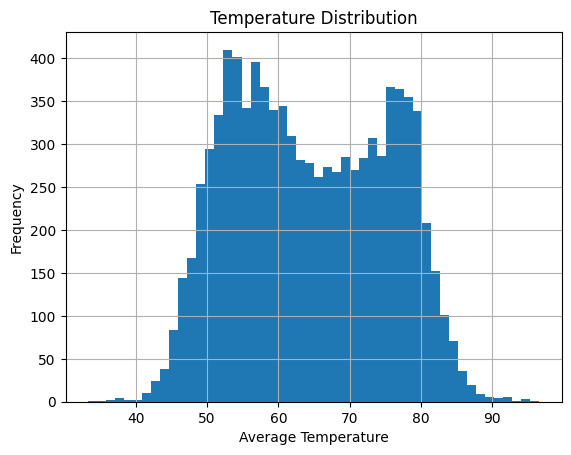

In [12]:
import matplotlib.pyplot as plt
df['AvgTemperature'].hist(bins=50)
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

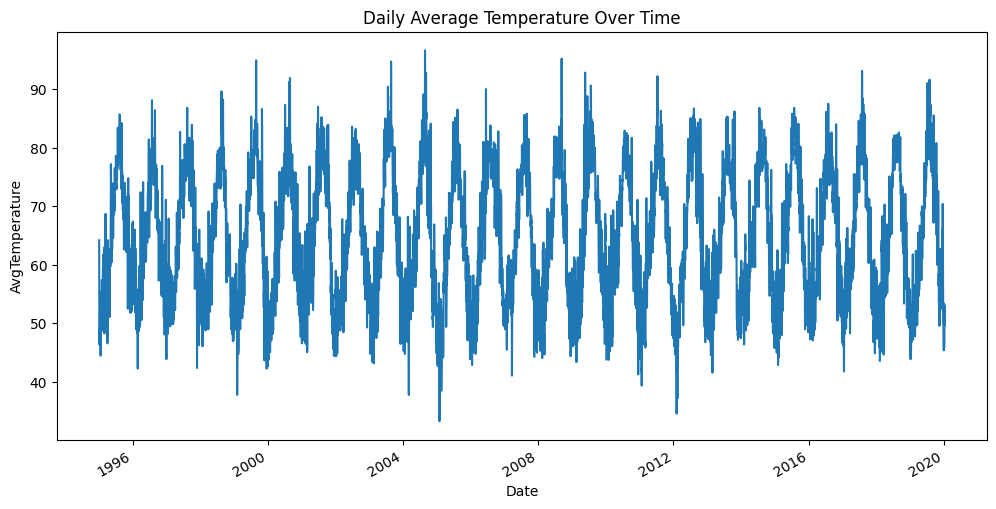

In [13]:
df['AvgTemperature'].plot(figsize=(12, 6))
plt.title('Daily Average Temperature Over Time')
plt.ylabel('AvgTemperature')
plt.show()

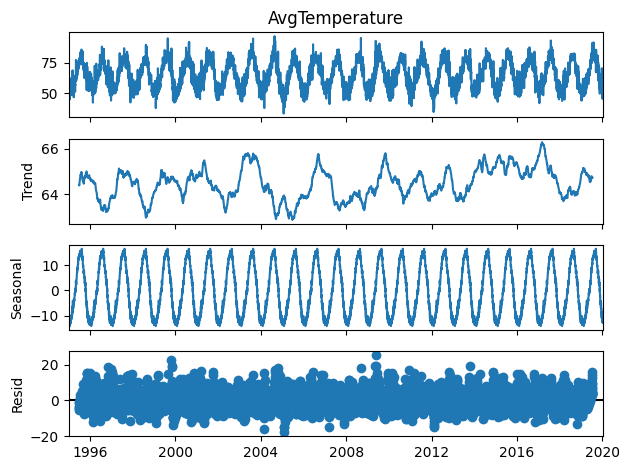

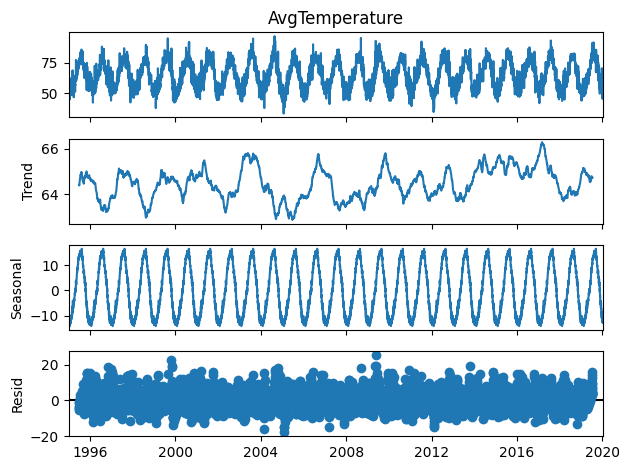

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['AvgTemperature'], model='additive', period=365)
result.plot()

In [15]:
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month

In [16]:
df['RollingMean'] = df['AvgTemperature'].rolling(window=7).mean()

In [1]:
!pip install autoviml

In [1]:
!pip install scipy==1.7.3

In [2]:
!pip uninstall numpy -y


Found existing installation: numpy 1.22.4
Uninstalling numpy-1.22.4:
  Successfully uninstalled numpy-1.22.4


In [1]:
!pip install numpy==1.21.0


In [1]:
!pip install pycaret

In [2]:
import pandas as pd
df = pd.read_csv('city_temperature.csv')

from pycaret.regression import *

# Set up PyCaret with the target variable
setup(df, target='AvgTemperature', session_id=123)

# Compare multiple models and select the best one
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,AvgTemperature
2,Target type,Regression
3,Original data shape,"(9143, 8)"
4,Transformed data shape,"(9143, 7)"
5,Transformed train set shape,"(6400, 7)"
6,Transformed test set shape,"(2743, 7)"
7,Numeric features,4
8,Categorical features,3
9,Rows with missing values,100.0%


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,4.0271,115.3968,10.3804,0.5247,0.1526,0.0616,1.7070
lightgbm,Light Gradient Boosting Machine,4.2607,123.5055,10.7292,0.4967,0.1201,0.0650,0.9870
et,Extra Trees Regressor,3.5333,117.2581,10.6278,0.4896,0.1715,0.0540,0.7800
gbr,Gradient Boosting Regressor,4.1053,128.5817,10.8334,0.4895,0.0870,0.0622,0.4750
rf,Random Forest Regressor,3.5463,122.1190,10.8085,0.4806,0.1548,0.0540,1.2500
xgboost,Extreme Gradient Boosting,4.1757,125.4238,10.9204,0.4703,0.1580,0.0646,1.2910
knn,K Neighbors Regressor,4.4252,132.9453,11.2182,0.4467,0.1432,0.0679,0.1120
ada,AdaBoost Regressor,5.7183,154.9763,11.9206,0.3755,0.1163,0.0854,0.1970
dt,Decision Tree Regressor,4.0418,187.0155,13.3331,0.1414,0.0787,0.0625,0.1130
omp,Orthogonal Matching Pursuit,9.3325,221.6254,14.6206,0.0503,0.1600,0.1440,0.1630


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [3]:
print(best_model)

In [4]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [5]:
tuned_model = tune_model(best_model)
evaluate_model(tuned_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.6726,197.2248,14.0437,0.4490,0.1792,0.0690
1,4.6517,217.4474,14.7461,0.4123,0.1640,0.0678
2,3.3128,20.4238,4.5193,0.8235,0.0745,0.0534
3,3.7254,71.6773,8.4662,0.5421,0.0811,0.0577
4,4.0787,101.0623,10.0530,0.4840,0.1088,0.0633
5,3.8940,110.8288,10.5275,0.5476,0.1116,0.0592
6,3.8144,73.0983,8.5498,0.5227,0.1003,0.0590
7,3.8496,100.0271,10.0014,0.4989,0.1215,0.0597
8,4.4259,177.2560,13.3138,0.4441,0.1237,0.0644


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

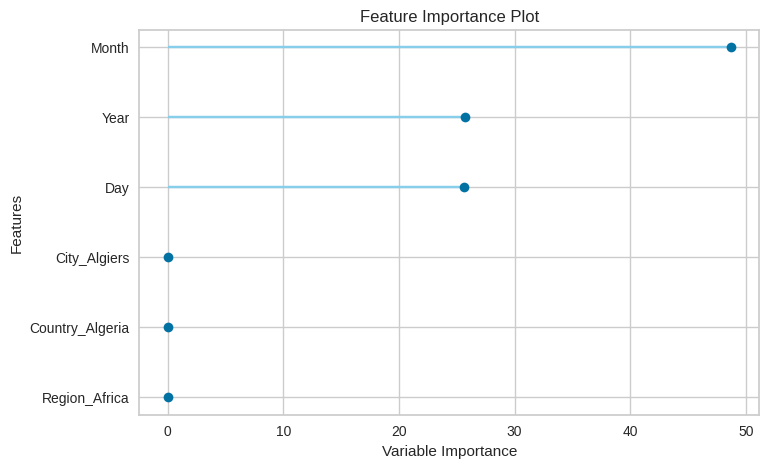

In [6]:
plot_model(tuned_model, plot='feature')

In [7]:
final_model = finalize_model(tuned_model)
save_model(final_model, 'final_temperature_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['State', 'Month', 'Day', 'Year'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Region', 'Country', 'City'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Region', 'Country', 'City'],
                                     transformer=OneHotEncoder(cols=['Region',
                                                                     'Country',
                                                                     'City'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('actual_estimator'

In [8]:
predictions = predict_model(final_model, data=df)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,3.2507,47.9282,6.9230,0.7811,0.1046,0.0504


,Region,Country,State,City,Month,Day,Year,AvgTemperature,prediction_label
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.199997,53.761922
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.400002,51.361840
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.799999,51.508732
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.400002,50.984303
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.900002,50.044192
